In [1]:
import rebound
import numpy as np 
import matplotlib.pyplot as plt
boxL = 10
sim = rebound.Simulation()
nx, ny = 2, 1
sim.widget(port=1242,size=(1000,1000))
sim.configure_box(boxL,nx,ny)
sim.boundary = "open"
sim.gravity = "tree"
sim.integrator = "leapfrog"
sim.softening = 1
sim.opening_angle2 = 1.5
np.random.seed(0)
M = 100
N = 1000
m = 100
T = 20
# più cresce M, o N, o Vx, o diminuisce mBH o vBH
# ovvero più il momento è dominato da quello della particelle
# più rispetto al centro di massa si muove veloce BH
# quindi più stelle sono più lente di lui ovvero rho(<vs)
Vx = 10
nrows = 20
ncols = int(N/nrows)
k = 0
xs = np.linspace(-nx*boxL/2,nx*boxL/2,ncols)
ys = np.linspace(-ny*boxL/2*0.9,ny*boxL/2*0.9,nrows)
for x in xs:
    for y in ys:
        vx = -2*Vx
        sim.add(m=M/N,x=x,y=y,vx=vx,r=boxL/200)
sim.add(m=m,x=boxL*(nx-1)/nx,y=0,vx=0,vy=0,hash="BH",r=boxL/50)
sim.collision = "none"
steps = int(1e4)
# v = np.zeros(steps)
# theta = np.zeros(steps)
v = []
theta = 0
i = 0
k = 0
Nparticles = sim.N
cycle = 0
# dt = sim.dt
def heartbeat(sim_pointer):
    global v, theta, i, Nparticles, k, cycle
    sim = sim_pointer.contents
    t = sim.t
    dt = boxL**3/(N-1)/(2*Vx)
    if np.floor(t/dt)>cycle:
        cycle += 1
        x = nx*boxL/2
        ys = np.linspace(-ny*boxL/2*0.9,ny*boxL/2*0.9,nrows)
        vx = -2*Vx
        for y in ys:
            sim.add(m=M/N,x=x,y=y,vx=vx,r=boxL/100)
        t = 0

        Nparticles = sim.N
    
    v = np.append(v,sim.particles["BH"].vx)
    i+=1

sim.heartbeat = heartbeat


RuntimeError: Error binding to port 1242. Port might be in use.


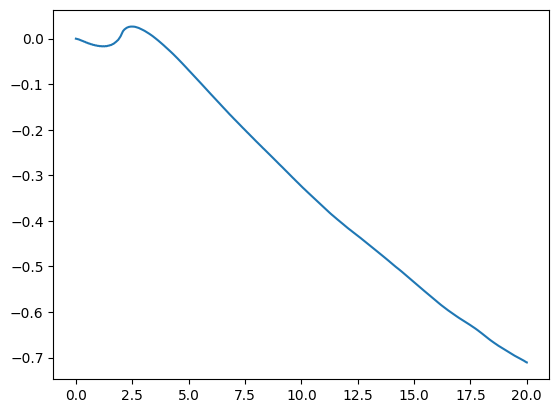

In [46]:
fig, ax = plt.subplots()

sim.integrate(T)
# sim.steps(steps)

ts = np.linspace(0,T,len(v))
ax.plot(ts,v)
plt.show()
# fig.savefig(f"N{N}m{m}t{T}.png")
